In [1]:
#Import Packages
import numpy as np
import os
import pickle
from multicontact_learning_local_objectives.python.machine_learning.ml_utils import *
import matplotlib.pyplot as plt #Matplotlib
import shutil

print("Double check the Path for storing trajectories is correct")

Double check the Path for storing trajectories is correct


In [2]:
#Define Path for Storing Trajectories
#Collect Data Points Path
#workingDirectory = "/home/jiayu/Desktop/multicontact_learning_local_objectives/data/large_slope_flat_patches/"
#workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Rubbles_DaggerExact/"
#workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Rubbles_Add2Steps"
#workingDirectory = "/media/jiayu/Seagate/Rubbles_Add2Step_KeepOutlier"
#workingDirectory = "/media/jiayu/Seagate/Rubbles_AddVarSteps_1to2StepbeforeFail_RemovebyClip/"
#workingDirectory = "/media/jiayu/Seagate/Rubbles_Add2Steps_1StepbeforeFail_RemovebyClip/"
#workingDirectory = "/media/jiayu/Seagate/LargeSlope_Angle_17_26/"
workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/LargeSlope_TimeTrack_Angle_17_26/"

#NOTE: need to have "/" at the end
print("Double Check we provide the Correct Traj Path: \n", workingDirectory)

#Define dataset folder
TrainingSetPath = [workingDirectory + "/DataSet/"+"TrainingInit",
                   workingDirectory + "/DataSet/"+"TrainingAug1Time_1StepBeforeFail_TrackTrainingExtra_InitSet",
                   workingDirectory + "/DataSet/"+"TrainingAug1Time_1StepBeforeFail_TrackTrainingInit_InitSet",
                   workingDirectory + "/DataSet/"+"TrainingAug1Time_2StepBeforeFail_TrackTrainingExtra_InitSet",
                   workingDirectory + "/DataSet/"+"TrainingAug1Time_2StepBeforeFail_TrackTrainingInit_InitSet",
                   workingDirectory + "/DataSet/"+"TrainingAug1Time_3StepBeforeFail_TrackTrainingExtra_InitSet",
                   workingDirectory + "/DataSet/"+"TrainingAug1Time_3StepBeforeFail_TrackTrainingInit_InitSet",
                   workingDirectory + "/DataSet/"+"TrainingAug2Time_1StepBeforeFail_TrackTrainingExtra_Aug_1Time",
                   workingDirectory + "/DataSet/"+"TrainingAug2Time_1StepBeforeFail_TrackTrainingInit_Aug_1Time",
                   workingDirectory + "/DataSet/"+"TrainingAug2Time_2StepBeforeFail_TrackTrainingExtra_Aug_1Time",
                   workingDirectory + "/DataSet/"+"TrainingAug2Time_2StepBeforeFail_TrackTrainingInit_Aug_1Time",
                   workingDirectory + "/DataSet/"+"TrainingAug2Time_3StepBeforeFail_TrackTrainingExtra_Aug_1Time",
                   workingDirectory + "/DataSet/"+"TrainingAug2Time_3StepBeforeFail_TrackTrainingInit_Aug_1Time",
                   workingDirectory + "/DataSet/"+"TrainingAug3Time_1StepBeforeFail_TrackTrainingExtra_Aug_2Time_EarlyStopping",
                   workingDirectory + "/DataSet/"+"TrainingAug3Time_1StepBeforeFail_TrackTrainingInit_Aug_2Time_EarlyStopping",
                   workingDirectory + "/DataSet/"+"TrainingAug3Time_2StepBeforeFail_TrackTrainingExtra_Aug_2Time_EarlyStopping",
                   workingDirectory + "/DataSet/"+"TrainingAug3Time_2StepBeforeFail_TrackTrainingInit_Aug_2Time_EarlyStopping",
                   workingDirectory + "/DataSet/"+"TrainingAug3Time_3StepBeforeFail_TrackTrainingExtra_Aug_2Time_EarlyStopping",
                   workingDirectory + "/DataSet/"+"TrainingAug3Time_3StepBeforeFail_TrackTrainingInit_Aug_2Time_EarlyStopping",
                   workingDirectory + "/DataSet/"+"TrainingAug4Time_1StepBeforeFail_TrackTrainingExtra_Aug_3Time_EarlyStopping",
                   workingDirectory + "/DataSet/"+"TrainingAug4Time_1StepBeforeFail_TrackTrainingInit_Aug_3Time_EarlyStopping",
                   workingDirectory + "/DataSet/"+"TrainingAug4Time_2StepBeforeFail_TrackTrainingExtra_Aug_3Time_EarlyStopping",
                   workingDirectory + "/DataSet/"+"TrainingAug4Time_2StepBeforeFail_TrackTrainingInit_Aug_3Time_EarlyStopping",
                   workingDirectory + "/DataSet/"+"TrainingAug4Time_3StepBeforeFail_TrackTrainingExtra_Aug_3Time_EarlyStopping",
                   workingDirectory + "/DataSet/"+"TrainingAug4Time_3StepBeforeFail_TrackTrainingInit_Aug_3Time_EarlyStopping",]

# TrainingSetPath = [workingDirectory + "/DataSet/"+"TrainingSet_Initial",
#                    workingDirectory + "/DataSet/"+"TrainingAug2Steps_1StepbeforeFail_1Time_RemovebyClip",]

# TrainingSetPath = [workingDirectory + "/DataSet/"+"TrainingSet",
#                    workingDirectory + "/DataSet/"+"Training_Aug_1StepBeforeFail_1Time",
#                    workingDirectory + "/DataSet/"+"Training_Aug_1StepBeforeFail_2Time",
#                    workingDirectory + "/DataSet/"+"Training_Aug_1StepBeforeFail_3Time"]

ValidationSetPath = workingDirectory + "/DataSet/"+"ValidationSet"
TestSetPath = workingDirectory + "/DataSet/"+"TestSet"

#Path to store ML Model, create one if we dont have
ML_Model_Path = workingDirectory + "/ML_Models/"
if not (os.path.isdir(ML_Model_Path)):
    os.mkdir(ML_Model_Path)


Double Check we provide the Correct Traj Path: 
 /home/jiayu/Desktop/MLP_DataSet/LargeSlope_TimeTrack_Angle_17_26/


In [3]:
#Learning Code
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.layers import Dropout

In [4]:
#Load DataSet File

#For training set
for trainingset_idx in range(len(TrainingSetPath)):
    trainingset_file = TrainingSetPath[trainingset_idx] + "/data"+'.p'
    trainingset = pickle.load(open(trainingset_file,"rb"))
    
    print("For dataset: ", trainingset_idx)
    print("DataSet Sizes: ")
    
    if trainingset_idx == 0:
        x_train = trainingset["input"]
        y_train = trainingset["output"]
    else:
        x_train = np.concatenate((x_train,trainingset["input"]),axis=0)
        y_train = np.concatenate((y_train,trainingset["output"]),axis=0)
    
    print(x_train.shape)
    print(y_train.shape)

    print("World Frame Shift: ", trainingset["Shift_World_Frame_Type"])
    print("Contact Location Representation Type: ",trainingset["Contact_Representation_Type"])
    print("Scaling Factor of Variables: ",trainingset["VectorScaleFactor"])
    print("Number of Preview Steps: ", trainingset["NumPreviewSteps"])
    print("Pre Process Mode: ",trainingset["PreProcessMode"])
    print(" ")

print("Final Data Set Size")
print(x_train.shape)
print(y_train.shape)
print(" ")

#For validation and Test

#Load Validation Set and Test Set
validationset_file = ValidationSetPath + "/data"+'.p'
validationset = pickle.load(open(validationset_file,"rb"))

testset_file = TestSetPath + "/data"+'.p'
testset = pickle.load(open(testset_file,"rb"))

x_valid = validationset["input"]
y_valid = validationset["output"]

x_test = testset["input"]
y_test = testset["output"]

print("Set Up for Validation Set")
print("World Frame Shift: ", validationset["Shift_World_Frame_Type"])
print("Contact Location Representation Type: ",validationset["Contact_Representation_Type"])
print("Scaling Factor of Variables: ",validationset["VectorScaleFactor"])
print("Number of Preview Steps: ", validationset["NumPreviewSteps"])
print("Pre Process Mode: ",validationset["PreProcessMode"])
print("Validation Set Size")
print(x_valid.shape)
print(y_valid.shape)
print(" ")

print(" ")

print("Set Up for Test Set")
print("World Frame Shift: ", testset["Shift_World_Frame_Type"])
print("Contact Location Representation Type: ",testset["Contact_Representation_Type"])
print("Scaling Factor of Variables: ",testset["VectorScaleFactor"])
print("Number of Preview Steps: ", testset["NumPreviewSteps"])
print("Pre Process Mode: ",testset["PreProcessMode"])
print("Test Set Size")
print(x_test.shape)
print(y_test.shape)
print(" ")

For dataset:  0
DataSet Sizes: 
(38880, 85)
(38880, 14)
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 
For dataset:  1
DataSet Sizes: 
(41539, 85)
(41539, 14)
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 
For dataset:  2
DataSet Sizes: 
(44392, 85)
(44392, 14)
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 
For dataset:  3
DataSet Sizes: 
(47469, 85)
(47469, 14)
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 
For dataset:  4
DataSet 

In [5]:
#Decide input and outpu dimensionality
d_in = x_train[0].shape[0]
print("input dim: ", d_in)
d_out = y_train[0].shape[0]
print("output dim:", d_out)
print(" ")

# #Double check with mean and std
# print("Inputs: ")
# print("Input Mean: ", x_train.mean(axis=0))
# print("Input Std: ", x_train.std(axis=0))
# print("Input Max: ", x_train.max(axis=0))
# print("Input Min: ", x_train.min(axis=0))
# print(" ")


# print("Output Mean: ", y_train.mean(axis=0))
# print("Output Std: ", y_train.std(axis=0))
# print("Output Max: ", y_train.max(axis=0))
# print("Output Min: ", y_train.min(axis=0))

# print("Final Data Set Size")
# print(x_train.shape)
# print(y_train.shape)

input dim:  85
output dim: 14
 


In [6]:
#Define learning model
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,)),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(d_out)
# ])
# loss: 4.6886e-04 - val_loss: 5.4786e-04

# #True code
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,)), #tanh
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(d_out, activation='linear')
# ])

# #True code
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,), kernel_regularizer='l1'), #tanh
#     Dense(256, activation='relu', kernel_regularizer='l1'),
#     Dense(256, activation='relu', kernel_regularizer='l1'),
#     Dense(256, activation='relu', kernel_regularizer='l1'),
#     Dense(d_out, activation='linear')
# ])

#True code
model = Sequential([
    Dense(256, activation='relu', input_shape=(d_in,), ), #tanh
    Dense(256, activation='relu', ),
    Dense(256, activation='relu', ),
    Dense(256, activation='relu', ),
    Dense(d_out, activation='linear')
])


In [29]:
#Train Learning Model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0000075), loss='mse') #0.0001

#history = model.fit(x_train, y_train, epochs = 50000, validation_split=0.0, batch_size = x_train.shape[0])
#history = model.fit(x_train, y_train, epochs = 3000, validation_split=0.0, batch_size = 1280) #1280
#Batch size = 1280 for remove outlier, 2560 for keep outlier
history = model.fit(x = x_train, y = y_train, epochs =500, batch_size = 5120, validation_data = (x_valid, y_valid),shuffle=True) #1280, 1000 epoch

Epoch 1/500
19/19 [==============================] - 0s 6ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 2/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 3/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 4/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 5/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 6/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 7/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 8/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 9/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 10/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 11/

19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 84/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 85/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 86/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 87/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 88/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 89/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 90/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 91/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 92/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 93/500


19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 246/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 247/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 248/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 249/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 250/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 251/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 252/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 253/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 254/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoc

19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 408/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 409/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 410/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 411/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 412/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 413/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 414/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 415/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 416/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0018
Epoc

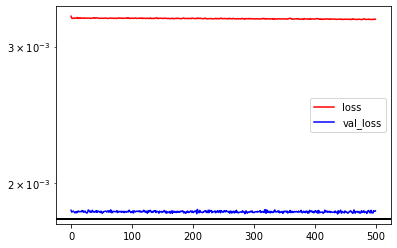

0.0018422575667500496


In [30]:
#Plot Training Progree
plt.plot(history.history['loss'], 'r', label='loss')
plt.yscale("log")
plt.plot(history.history['val_loss'], 'b', label='val_loss') if 'val_loss' in history.history else None
plt.legend()
plt.axhline(y=0.0018, xmin=0, xmax=5, linewidth=2, color = 'k')
plt.show()
print(history.history['val_loss'][-1])

In [25]:
#Save Trained Model
#MLmodel_name = "NN_Model_Valid_" + trainingset["PreProcessMode"] + "_Dagger_InitSet_2Iter"
#MLmodel_name = "NN_Model" + "_" + "AugVarStep_1to2StepbeforeFail_3Time_RemovebyClip_SmallThre"
MLmodel_name = "NN_Model" + "_" + "Aug_4Time"
model.save(ML_Model_Path + MLmodel_name)

INFO:tensorflow:Assets written to: /home/jiayu/Desktop/MLP_DataSet/LargeSlope_TimeTrack_Angle_17_26//ML_Models/NN_Model_Aug_4Time/assets


In [26]:
#Save DataSet Setttings
datasetSettings = {"Shift_World_Frame_Type":trainingset["Shift_World_Frame_Type"],
                   "VectorScaleFactor":trainingset["VectorScaleFactor"],
                   "NumPreviewSteps":trainingset["NumPreviewSteps"],
                   "Contact_Representation_Type":trainingset["Contact_Representation_Type"],
                   "TrainingLoss":history.history['loss']}
#Validation loss
datasetSettings["ValidationLoss"] = history.history['val_loss'] if 'val_loss' in history.history else None

#ProProcess
datasetSettings["PreProcessMode"] = trainingset["PreProcessMode"]
datasetSettings["Scaler_X"] = trainingset["Scaler_X"]

datasetSettings["Scaler_Y"] = trainingset["Scaler_Y"]

#Dump File
pickle.dump(datasetSettings, open(ML_Model_Path + MLmodel_name+ '/datasetSettings' +'.p', "wb"))

In [16]:
#Show Prediction Result for Training
from sklearn import preprocessing
import time

datapoint_num = 0

x_test = np.array([x_train[datapoint_num]])

start = time.time()
y_pred_temp = model.predict(x_test)
end = time.time()

print(x_train[datapoint_num])

#Recover to original format
if trainingset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_originalform = y_pred_temp/trainingset["VectorScaleFactor"]
    y_true_originalform = y_train[datapoint_num]/trainingset["VectorScaleFactor"]
elif trainingset["PreProcessMode"] == "Standarization" or trainingset["PreProcessMode"] == "MaxAbs":
    y_pred_originalform = dataset["Scaler_Y"].inverse_transform(y_pred_temp)
    y_true_originalform = dataset["Scaler_Y"].inverse_transform(np.array([y_train[datapoint_num]]))
else:
    raise Exception("Unknow Pre Process Mode")


print("predicted result: \n",y_pred_originalform)
print("true value: \n",y_true_originalform)
print("diff: \n", np.absolute(y_pred_originalform - y_true_originalform))


print("Neural Network Time: ", end - start)

[-1.16898236e-01  1.36893514e-02  7.78614581e-01  1.60702856e-01
 -1.00131502e-01 -2.82221670e-02 -4.23586116e-08 -4.66310963e-08
  3.62160760e-09 -3.04074891e-01  1.84197779e-01  8.60246897e-02
  1.00000000e+00  1.10000022e-01  1.12409997e+00  1.44698797e-01
 -4.64999978e-01  1.11437414e+00  2.23371473e-01 -4.64999978e-01
  1.21929106e-01  1.00681383e-01  1.10000022e-01  1.31654942e-01
  2.20087066e-02  1.10000022e-01  1.34375748e-01  1.02889919e-13
 -4.64999978e-01  1.34375748e-01  1.02889919e-13 -4.64999978e-01
 -8.73236732e-01  1.02876041e-13  1.10000022e-01 -8.73236732e-01
  1.02876041e-13  6.85000022e-01  1.11519838e+00  2.16704166e-01
  1.10000022e-01  1.12327573e+00  1.51366104e-01  1.10000022e-01
  1.30830702e-01  2.86760141e-02  6.85000022e-01  1.22753345e-01
  9.40140759e-02  6.85000022e-01  1.22180474e-01  9.86480555e-02
  1.10000022e-01  1.31403573e-01  2.40420345e-02  1.10000022e-01
 -8.61041459e-01 -9.86480555e-02  6.85000022e-01 -8.70264558e-01
 -2.40420345e-02  1.26000

Data Kept Original Form, But need to scale back to meters
[0.39350669 0.39361919 0.39368588 0.39377377 0.39378715 0.39379598
 0.39382639 0.39399616 0.39401449 0.39404428 0.39409824 0.39419678
 0.39422182 0.39424177 0.39427567 0.39427646 0.39433654 0.39445311
 0.3944786  0.3945325  0.39454502 0.39461596 0.39471665 0.39477476
 0.3948205  0.3949957  0.39507741 0.39523784 0.39545445 0.39550179
 0.39568079 0.39573832 0.39588872 0.39591768 0.39591924 0.39598398
 0.3960172  0.39605065 0.39613502 0.39615698 0.39616735 0.39618027
 0.3962296  0.39625033 0.39629595 0.39634794 0.39640241 0.39657865
 0.39666362 0.39677161 0.39696105 0.39699708 0.39701704 0.39704756
 0.3970667  0.39717595 0.39721997 0.39725666 0.39731583 0.39739774
 0.39744326 0.3974725  0.39756463 0.39773263 0.39788975 0.39811118
 0.39812111 0.39824355 0.39825574 0.39831421 0.39841442 0.39842047
 0.398486   0.39866567 0.39868162 0.39876236 0.39876498 0.39881217
 0.39885314 0.3988729  0.39895233 0.39904697 0.39904778 0.39915182
 0.3

(array([3., 7., 5., 7., 5., 0., 3., 2., 6., 4., 5., 0., 2., 3., 0., 7., 3.,
        3., 2., 0., 4., 5., 6., 3., 1., 0., 3., 9., 1., 1.]),
 array([ 0.        ,  0.93333333,  1.86666667,  2.8       ,  3.73333333,
         4.66666667,  5.6       ,  6.53333333,  7.46666667,  8.4       ,
         9.33333333, 10.26666667, 11.2       , 12.13333333, 13.06666667,
        14.        , 14.93333333, 15.86666667, 16.8       , 17.73333333,
        18.66666667, 19.6       , 20.53333333, 21.46666667, 22.4       ,
        23.33333333, 24.26666667, 25.2       , 26.13333333, 27.06666667,
        28.        ]),
 <BarContainer object of 30 artists>)

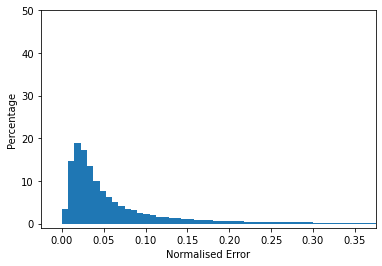

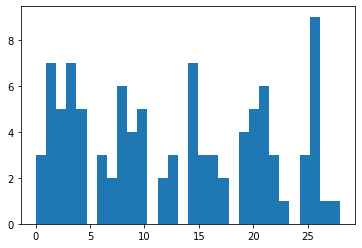

In [17]:
#Error Stat with Training Set
import matplotlib.pyplot as plt
y_pred_train = model.predict(x_train)

if trainingset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_train_originalform = y_pred_train/trainingset["VectorScaleFactor"]
    y_true_train_originalform = y_train/trainingset["VectorScaleFactor"]
elif trainingset["PreProcessMode"] == "Standarization" or trainingset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", trainingset["PreProcessMode"])
    y_pred_train_originalform = trainingset["Scaler_Y"].inverse_transform(y_pred_train)
    y_true_train_originalform = trainingset["Scaler_Y"].inverse_transform(y_train)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
#err = np.linalg.norm(y_true_train_originalform[:,-3:]-y_pred_train_originalform[:,-3:], axis=1)
err = np.linalg.norm(y_true_train_originalform[:,-3:]-y_pred_train_originalform[:,-3:], axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted[-1000:])  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())

##Plot prediction on the initial dataset
err_initdata=err[0:12000+1]

err_initdata_sorted = np.sort(err_initdata)
print(err_initdata_sorted[-100:])  # print the 100 biggest error

err_initdata_idx_sorted = np.argsort(err_initdata)
print(err_initdata_idx_sorted[-100:]%30)
selected_err=err_initdata_idx_sorted[-100:]%30
fig=plt.figure();   ax = fig.gca()
plt.hist(selected_err, bins=30)

Data Kept Original Form, But need to scale back to meters
[0.0152655  0.01924194 0.01993528 ... 1.37106785 1.56014468 1.57593845]
Error Mean:  0.1182508332592285
Error Std 0.10569500468976349


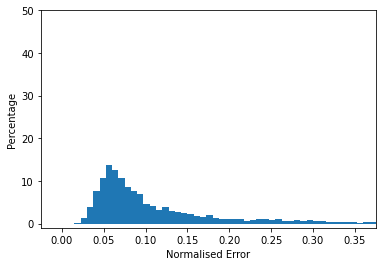

In [38]:
#Error Stat with Validation Set

y_pred_valid = model.predict(x_valid)


if validationset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_valid_originalform = y_pred_valid/validationset["VectorScaleFactor"]
    y_true_valid_originalform = y_valid/validationset["VectorScaleFactor"]
elif validationset["PreProcessMode"] == "Standarization" or validationset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", validationset["PreProcessMode"])
    y_pred_valid_originalform = validationset["Scaler_Y"].inverse_transform(y_pred_valid)
    y_true_valid_originalform = validationset["Scaler_Y"].inverse_transform(y_valid)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
err = np.linalg.norm(y_true_valid_originalform-y_pred_valid_originalform, axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted)  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())



[[ 1.25184772e-02 -1.47172540e-01  1.24203298e-01 ... -2.53796893e-02
   9.51831367e-04  2.11604073e-01]
 [-5.57569303e-04  8.52804604e-02  3.60013521e-02 ... -2.89573721e-01
  -7.58581505e-01  1.36294719e-01]
 [ 9.30173466e-02 -2.70568120e-02  1.18602778e-01 ... -1.10852825e-02
  -1.84420381e-02 -5.19030573e-02]
 ...
 [ 1.23190557e-01 -6.72411612e-02  4.32211888e-02 ...  2.71126215e-03
  -6.25478368e-03  7.58849170e-02]
 [ 1.81226783e-01  9.48602851e-02  1.54669764e-01 ... -2.16014314e-01
  -8.20502761e-01 -4.03573832e-01]
 [ 8.62224370e-02 -8.37325195e-02  2.49926418e-02 ... -5.07909210e-03
  -5.48972966e-03  7.41409614e-02]]
Data Kept Original Form, But need to scale back to meters
[0.03858617 0.0447075  0.04813154 ... 2.2925241  2.32051504 2.39680686]
Error Mean:  0.8388263259099799
Error Std 0.3953971995084884


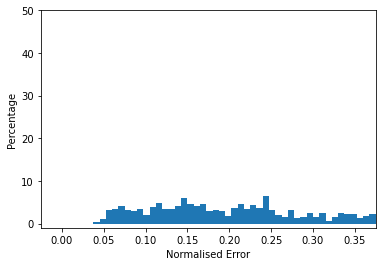

In [42]:
#Error Stat with Test Set

y_pred_test = model.predict(x_test)


if testset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_test_originalform = y_pred_test/testset["VectorScaleFactor"]
    y_true_test_originalform = y_test/testset["VectorScaleFactor"]
elif testset["PreProcessMode"] == "Standarization" or testset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", validationset["PreProcessMode"])
    y_pred_test_originalform = validationset["Scaler_Y"].inverse_transform(y_pred_test)
    y_true_test_originalform = validationset["Scaler_Y"].inverse_transform(y_test)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
err = np.linalg.norm(y_pred_test_originalform-y_true_test_originalform, axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted)  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())